In [ ]:
import pandas as pd

### Chargement des données

Données : https://github.com/CVidalG/Index-of-Armenian-Manuscripts

In [ ]:
file_path = "Index of Armenian Manuscripts.csv"
df = pd.read_csv(file_path)

In [20]:
df.head()

,ID,Cat. Number,Location,Country,Town,Permalink,Digital Library,Support,Date,Pages,Size,Title,Note,Genre
0,ALQ1,AODA 00001,Armenian Church. Diocese of Aleppo,Syria,Aleppo,See manuscript,HMML,Paper,1632-1632,564 pages,21.0 x 15.0 x 5.0 cm,Gospels,NaN,NaN
1,ALQ100,AODA 00100,Armenian Church. Diocese of Aleppo,Syria,Aleppo,See manuscript,HMML,Paper,1300-1500,422 pages,15.5 x 23.0 x 5.0 cm,Mashtotsʻ,NaN,NaN
2,ALQ101,AODA 00101,Armenian Church. Diocese of Aleppo,Syria,Aleppo,See manuscript,HMML,Paper,1700-1800,416 pages,11.5 x 17.0 x 3.0 cm,Mashtotsʻ,NaN,NaN
3,ALQ102,AODA 00102,Armenian Church. Diocese of Aleppo,Syria,Aleppo,See manuscript,HMML,Paper,1673-1673,238 pages,13.0 x 19.5 x 2.5 cm,Mashtotsʻ,NaN,NaN
4,ALQ103,AODA 00103,Armenian Church. Diocese of Aleppo,Syria,Aleppo,See manuscript,HMML,Paper,1500-1700,274 pages,13.5 x 19.0 x 4.0 cm,Mashtotsʻ,NaN,NaN


### Etude qualitative du dataset / recherche de corrélations sans a priori

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df_clean = df.copy()

In [ ]:
# Extraction valeurs numériques
df_clean[['Start Year', 'End Year']] = df_clean['Date'].str.extract(r'(\d{4})-?(\d{4})?')
df_clean['Start Year'] = pd.to_numeric(df_clean['Start Year'], errors='coerce')
df_clean['End Year'] = pd.to_numeric(df_clean['End Year'], errors='coerce')

In [ ]:
df_clean['End Year'].fillna(df_clean['Start Year'], inplace=True)

# Conversion en numérique
df_clean['Pages'] = df_clean['Pages'].str.extract(r'(\d+)').astype(float)

# Conversion dimensions manuscrit
df_clean[['Width', 'Height', 'Depth']] = df_clean['Size'].str.extract(r'([\d.]+) x ([\d.]+) x ([\d.]+)')
df_clean[['Width', 'Height', 'Depth']] = df_clean[['Width', 'Height', 'Depth']].astype(float)

/var/folders/x7/s2ydkrpn7xb7jfnym9v1gzf80000gn/T/ipykernel_13910/3391171785.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['End Year'].fillna(df_clean['Start Year'], inplace=True)


In [ ]:
# Transformation des variables qualitatives en index
df_clean['Support'] = df_clean['Support'].astype('category').cat.codes
df_clean['Country'] = df_clean['Country'].astype('category').cat.codes
df_clean['Location'] = df_clean['Location'].astype('category').cat.codes

In [ ]:
# Sélection de colonnes pour les corrélations
corr_columns = ['Start Year', 'End Year', 'Pages', 'Width', 'Height', 'Depth', 'Support', 'Country', 'Location']
df_corr = df_clean[corr_columns].dropna()

# Matrice de corrélations
corr_matrix = df_corr.corr()

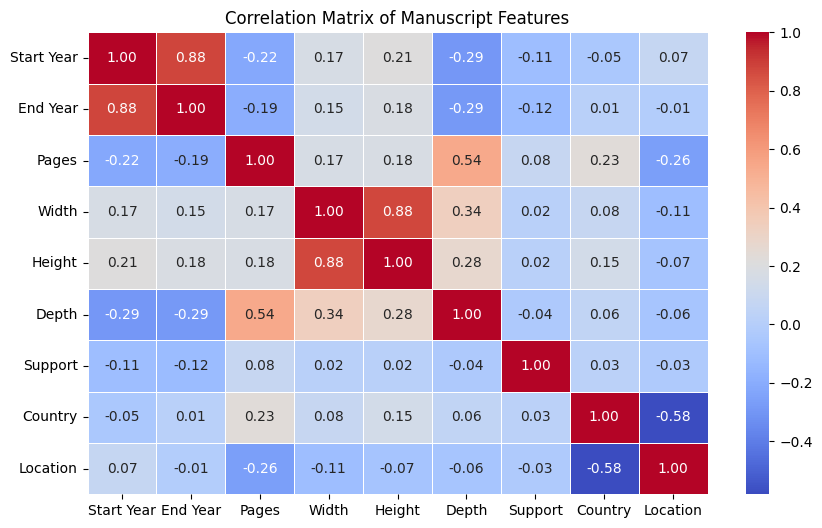

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Manuscript Features")
plt.show()


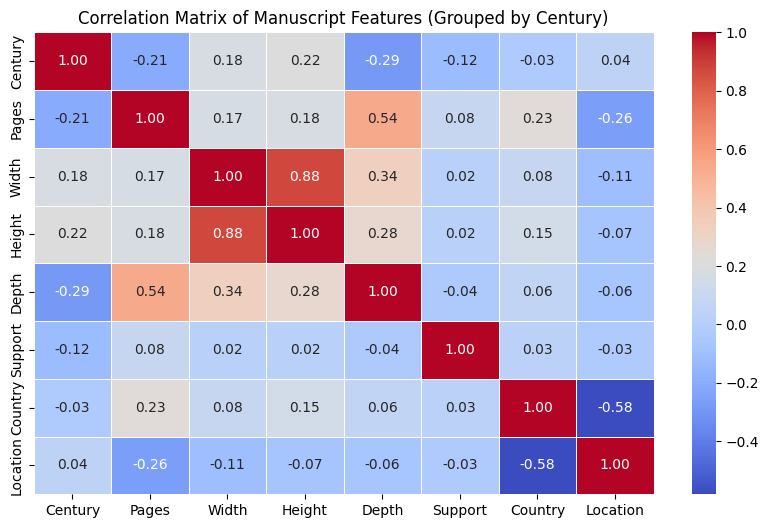

In [ ]:
def get_century(year):
    if pd.isna(year):
        return None
    return (int(year) // 100 + 1)  


df_clean['Century'] = df_clean['Start Year'].apply(get_century)
df_clean['Century'] = df_clean['Century'].astype('category')

corr_columns = ['Century', 'Pages', 'Width', 'Height', 'Depth', 'Support', 'Country', 'Location']
df_corr = df_clean[corr_columns].dropna()

df_corr['Century'] = df_corr['Century'].cat.codes

corr_matrix_century = df_corr.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_century, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Manuscript Features (Grouped by Century)")
plt.show()


### Viz de tendances

/var/folders/x7/s2ydkrpn7xb7jfnym9v1gzf80000gn/T/ipykernel_13910/1055315324.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_size_trend = df_clean.groupby('Century')[['Width', 'Height', 'Depth']].mean().reset_index()


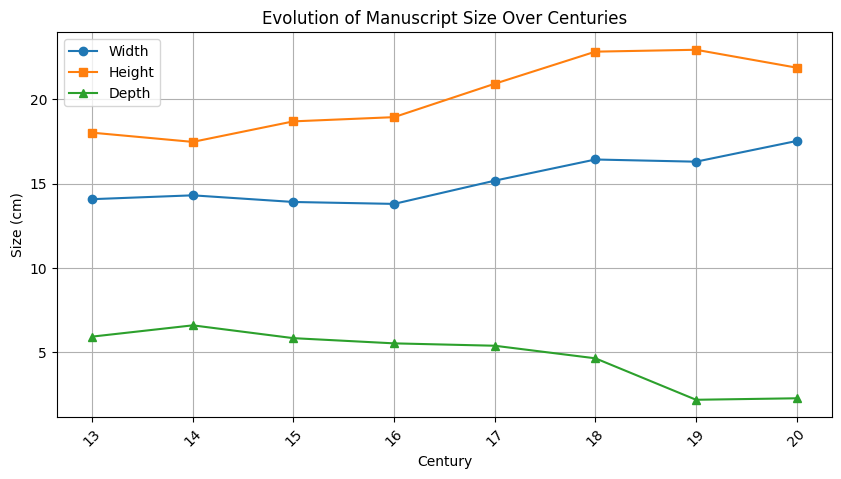

In [ ]:
# Visualisation de la taille des manuscrits à travers les sièclescenturies

df_size_trend = df_clean.groupby('Century')[['Width', 'Height', 'Depth']].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_size_trend['Century'], df_size_trend['Width'], marker='o', linestyle='-', label="Width")
plt.plot(df_size_trend['Century'], df_size_trend['Height'], marker='s', linestyle='-', label="Height")
plt.plot(df_size_trend['Century'], df_size_trend['Depth'], marker='^', linestyle='-', label="Depth")
plt.xlabel("Century")
plt.ylabel("Size (cm)")
plt.title("Evolution of Manuscript Size Over Centuries")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

/var/folders/x7/s2ydkrpn7xb7jfnym9v1gzf80000gn/T/ipykernel_13910/345710036.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_pages_trend = df_clean.groupby('Century')['Pages'].mean().reset_index()


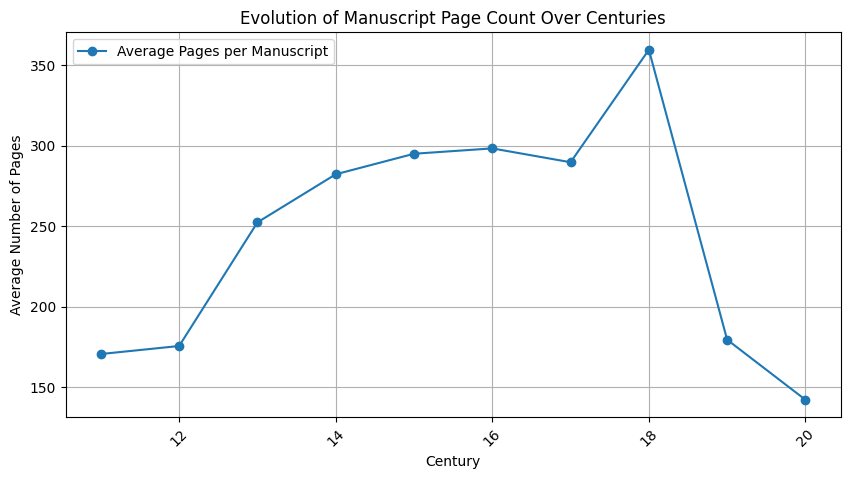

In [ ]:
# Visualisation du nombre de pages à travers les siècles

df_pages_trend = df_clean.groupby('Century')['Pages'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_pages_trend['Century'], df_pages_trend['Pages'], marker='o', linestyle='-', label="Average Pages per Manuscript")
plt.xlabel("Century")
plt.ylabel("Average Number of Pages")
plt.title("Evolution of Manuscript Page Count Over Centuries")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()


### Classification / Régression (naïve)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

features = ['Pages', 'Width', 'Height', 'Depth', 'Support', 'Country', 'Location']
df_model = df_clean.dropna(subset=['Century'] + features).copy()

# Encodage des siècles avec un index
df_model['Century'] = df_model['Century'].cat.codes

# Partage des données pour l'entraînement
X = df_model[features]
y = df_model['Century']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(0.47305389221556887,
 '              precision    recall  f1-score   support\n\n           2       1.00      0.67      0.80         3\n           3       0.33      0.14      0.20         7\n           4       0.00      0.00      0.00         9\n           5       0.20      0.11      0.14         9\n           6       0.45      0.56      0.50        50\n           7       0.58      0.63      0.60        59\n           8       0.35      0.36      0.35        25\n           9       1.00      0.20      0.33         5\n\n    accuracy                           0.47       167\n   macro avg       0.49      0.33      0.37       167\nweighted avg       0.46      0.47      0.46       167\n')

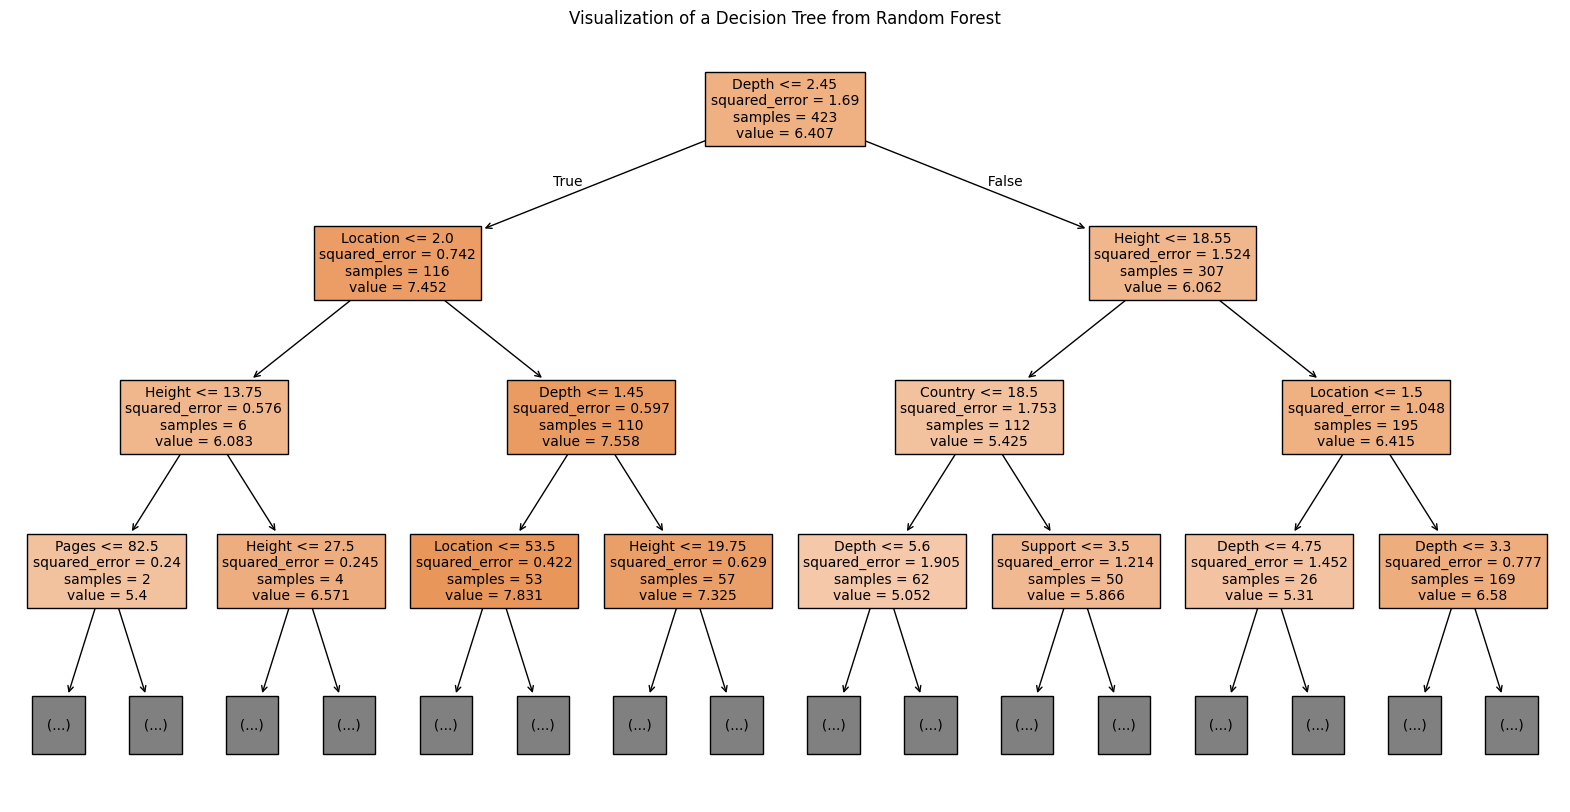

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(regressor.estimators_[0], feature_names=X_train.columns, filled=True, max_depth=3, fontsize=10)
plt.title("Visualization of a Decision Tree from Random Forest")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

y_pred_reg = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_reg)

mae

np.float64(0.7832934131736528)